## **Description**
#### **Background and Context**
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Objective**
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Data Description**
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

**Data Dictionary**

**Customer details:**
1.  **RowNumber**:  Row number.
2.  **CustomerId**:  Unique identification key for different customers.
3.  **Surname**:  Surname of the customer
4.  **Credit Score**:  A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
5.  **Geography**:  The country to which the customer belongs.
6.  **Gender**:  The gender of the customer.
7.  **Age**:  Age of the customer.
8.  **Tenure**:  The period of time a customer has been associated with the bank.
9.  **Balance**:  The account balance (the amount of money deposited in the bank account) of the customer.
10. **NumOfProducts**:  How many accounts, bank account affiliated products the person has.
11. **HasCrCard**:  Does the customer have a credit card through the bank?
12. **IsActiveMember**:   A categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc.) (entry updated 6/24)
13. **EstimatedSalary**:  Estimated salary of the customer.
14. **NumberOfChildrenVisited**:  Total number of children with age less than 5 visit with customer
15. **Exited**:  Did they leave the bank after all?


**Best Practices for Notebook:**
- The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
- The notebook should be run from start to finish in a sequential manner before submission.
- It is preferable to remove all warnings and errors before submission.
- The notebook should be submitted as an HTML file (.html) and as a notebook file (.ipynb)

**Submission Guidelines:**
1. There are two parts to the submission:
    1. A well commented Jupyter notebook
    2. File converted to HTML format
2. Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
3. Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
4. Submission will not be evaluated if,
    1. it is submitted post-deadline, or,
    2. more than 2 files are submitted

Happy Learning!!

## Reading Dataset and Feature Elimination
### Read the dataset properly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.metrics
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
input_file = "bank.csv"
df = pd.read_csv(input_file)

## Print the overview of the data (statistical summary, shape, info, etc)

In [3]:
# statistical summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
# shape
df.shape

(10000, 14)

In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# sample
n = 10
df.sample(n=n)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2655,2656,15643658,Barber,850,Germany,Male,53,2,94078.97,2,1,0,36980.54,0
7306,7307,15807546,Chinwendu,837,France,Female,38,2,0.00,2,1,1,46395.21,0
7836,7837,15780492,Ignatyeva,648,France,Male,42,4,0.00,2,1,0,19283.14,0
7319,7320,15762045,Gilchrist,474,Germany,Female,37,5,142688.57,2,1,1,110953.33,0
1440,1441,15796334,Chukwualuka,558,Germany,Male,39,10,144757.02,1,1,0,22878.16,1
3731,3732,15568573,Graham,554,Germany,Female,51,7,105701.91,1,0,1,179797.79,1
1262,1263,15747591,Chung,665,Spain,Female,40,1,173432.55,1,0,1,116766.79,0
5303,5304,15645766,Kosisochukwu,634,Spain,Male,25,9,0.00,2,1,1,8227.91,0
2198,2199,15573876,Chia,473,Spain,Male,48,8,0.00,2,1,0,71139.80,0
8352,8353,15641413,Crawford,587,Germany,Female,49,7,155393.98,2,1,0,13308.20,1


## Eliminate the unique features from the dataset with proper reasoning

In [7]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Based on the number of unique values, we should definitely get rid of:
- RowNumber
- CustomerId

I'm interested in taking a closer look at Surname.  At 2932 unique values, that's an average of between 3 and 4 instances per surname.

In [8]:
groupby_surname_df = df[['Surname', 'RowNumber']].groupby('Surname').count().rename(columns={'RowNumber':'Occurrences of Surname'})
groupby_surname_df.sort_values(by='Occurrences of Surname', ascending=False)

,Occurrences of Surname
Surname,
Smith,32
Martin,29
Scott,29
Walker,28
Brown,26
...,...
Etheridge,1
Milliner,1
Milligan,1


Lots of occurrences of Smith.

In [9]:
groupby_surname_counts_df = groupby_surname_df.reset_index().groupby('Occurrences of Surname').count().rename(columns={'Surname':'Number of Surnames'}).reset_index()
groupby_surname_counts_df.head(6).style.hide_index()

Occurrences of Surname,Number of Surnames
1,1558
2,354
3,222
4,177
5,126
6,82


Here we take a look at how many surnames appear how many times in the data.



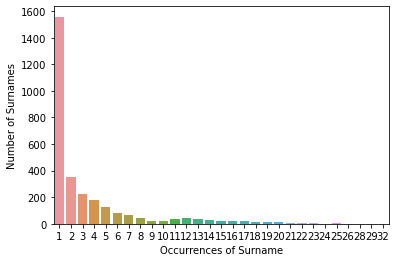

Now we can see that the vast majority of surnames appear only once in the data.


In [10]:
print("Here we take a look at how many surnames appear how many times in the data.", end='\n\n')
x = 'Occurrences of Surname'
y = 'Number of Surnames'
sns.barplot(data=groupby_surname_counts_df, x=x, y=y)
plt.show()
print("Now we can see that the vast majority of surnames appear only once in the data.")

I think that keeping surname would just lead to overfitting on certain data points.  For instance, the neural network would quickly cue in on the occurrence of a 'Gates' or 'Buffett' or 'Bezos'.  

I think it is just safer to drop the surname here.

In [11]:
# Printing this again so that scrolling back up is not necessary
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

The other variables with a lot of variation, Balance and Estimated Salary, I'd like to examine more before dropping or keeping.<br>
The Balance variable is likely fine, (and we want a lot of variation in our numeric variables in order to estimate effects).<br>
However, the Estimated Salary looks suspicious.  By its name, it looks like it is the result of some other model.  Additionally, 9999 is an unusual number.  On the one hand, why not 10000?  And, on the other hand, why are there not more duplicates?

In [12]:
cols_to_drop = ['RowNumber', 'CustomerId', 'Surname']

In [13]:
orig_df = df.copy
df.drop(columns=cols_to_drop, inplace=True)
df.sample(n=n)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8822,543,France,Male,64,4,0.00,2,1,1,148305.82,0
2690,648,Spain,Male,42,2,98795.61,2,1,0,89123.99,0
2482,567,Spain,Male,40,4,118628.80,1,0,0,91973.63,0
8266,560,France,Female,35,1,0.00,2,1,0,3701.63,0
5069,655,Spain,Female,29,9,0.00,2,0,1,85736.26,0
5136,717,Germany,Female,64,10,98362.35,2,1,1,21630.21,0
4209,682,France,Male,55,9,0.00,1,1,0,153356.80,1
4373,546,Spain,Female,45,2,0.00,1,0,0,197789.83,1
2790,540,Germany,Male,39,4,127278.31,1,1,1,16150.34,0
702,594,Spain,Female,49,2,126615.94,2,0,1,123214.74,0


# Perform an Exploratory Data Analysis on the data
## Checked whether the dataset is balanced or not

In [14]:
df[['Exited','CreditScore']].groupby('Exited').count().rename(columns={'CreditScore':'Count'})

,Count
Exited,
0,7963
1,2037


The dataset is not balanced.  It is not as extremely imbalanced as if we were searching for cancer or terrorism or credit card fraud, but it is not 50-50 either.  We're looking at about 80% not exited against 20% exited.

## Bivariate analysis

In [15]:
# Taking a look at all the variables.
print("Here are the variables:")
for var in df.columns:
    print('\t', var)

Here are the variables:
	 CreditScore
	 Geography
	 Gender
	 Age
	 Tenure
	 Balance
	 NumOfProducts
	 HasCrCard
	 IsActiveMember
	 EstimatedSalary
	 Exited


In [16]:
y_variable = 'Exited'

POSITIVE_CASE = 1
NEGATIVE_CASE = 0
# Couldn't figure out how to do this in one-line.
x_variables = df.columns.to_list()  # Gets all variables from dataframe
x_variables.remove(y_variable)      # removes the dependent variable 
print(x_variables)                  # Now we have just the x's.'

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [17]:
def my_t_test(x_var, y_var, positive_case = POSITIVE_CASE, negative_case = NEGATIVE_CASE, input_dataframe = df, alpha = .05):
    '''
    Calculating summary statistics and performing a t-test from those summary statistics.
    This version will only be used for a two-tailed t-test for simplicity.
    Could be enhanced later.
    '''
    
    x0 = input_dataframe[input_dataframe[y_var] == negative_case][x_var].mean()  # x-bar_0
    x1 = input_dataframe[input_dataframe[y_var] == positive_case][x_var].mean() # x-bar_1
    s0 = input_dataframe[input_dataframe[y_var] == negative_case][x_var].std() # std_0
    s1 = input_dataframe[input_dataframe[y_var] == positive_case][x_var].std() # std_1
    n0 = input_dataframe[input_dataframe[y_var] == negative_case][x_var].count() 
    n1 = input_dataframe[input_dataframe[y_var] == positive_case][x_var].count()
    
    pooled_variance = (((n1-1) * (s1 ** 2)) + ((n0-1) * (s0 ** 2)))/(n1 + n0 -2)
    t = (x1 - x0)/np.sqrt(pooled_variance * ((1/n1) + (1/n0)))
    degrees_of_freedom = ((((s1**2)/n1) + ((s0**2)/n0)) ** 2)/((((s1**2)/n1)**2)/(n1-1) + (((s0**2)/n0)**2)/(n0-1))
    crit_t = scipy.stats.t.ppf(1-(alpha/2), degrees_of_freedom)
    pval = scipy.stats.t.sf(np.abs(t), degrees_of_freedom - 1) * 2
    my_output = [["t", "df", "crit_t", "p"], [t, degrees_of_freedom, crit_t, pval]]
    return(my_output)

In [18]:
# This function handles bivariate analysis.  (Default parameters for this y_var and this input_dataframe)
def my_bivariate_analysis_function(x_var, y_var = y_variable, positive_case = POSITIVE_CASE, negative_case = NEGATIVE_CASE, input_dataframe = df, alpha = 0.05):
    sns.set(rc={'figure.figsize':(21,7)})
    
    print("Now considering the variable {0} vs {1}...\n".format(x_var, y_var))
    
    # If it is a numeric variable, execute a violinplot bivariate analysis.
    if str(input_dataframe[x_var].dtype) == 'float64' or str(df[x_var].dtype) == 'int64':
        
        x_bar_0 = round(input_dataframe[input_dataframe[y_var] == negative_case][x_var].mean(), 2)
        x_bar_1 = round(input_dataframe[input_dataframe[y_var] == positive_case][x_var].mean(), 2)
        if math.isnan(x_bar_0):
            pass
        else:
            print("The mean {x_var} of those who have {y_var} is {x_bar_1}.".format(x_var = x_var, y_var = y_var, x_bar_1 = x_bar_1))
            print("The mean {x_var} of those who have not {y_var} is {x_bar_0}.".format(x_var = x_var, y_var = y_var, x_bar_0 = x_bar_0))
            my_t = my_t_test(x_var=x_var,
                             y_var=y_var,
                             positive_case=positive_case,
                             negative_case=negative_case
                            )[1][0]  #  This grabs the t-statistic from my function.
            my_p = my_t_test(x_var=x_var,
                             y_var=y_var,
                             positive_case=positive_case,
                             negative_case=negative_case
                            )[1][3]  #  This grabs the p-value from my function.
        
            if(my_p < alpha):
                print("This difference in means is significant.\n\t(p-value = {p}; t-stat = {t}).".format(p = my_p, t = round(my_t, 3)))
            else:
                print("This difference in means is not statistically significant.")
        
        col1 = y_var
        col2 = x_var
        data = input_dataframe
        sns.catplot(x=col1, y=col2, kind='violin', data=data).set_xticklabels(rotation=45);
        plt.show()
        
    # If it is a non-numeric variable, 
    elif str(input_dataframe[x_var].dtype) == 'category' or str(input_dataframe[x_var].dtype) == 'object':
        col1 = y_var
        col2 = x_var
        data = df
        sns.catplot(hue=col1, x=col2, kind='count', data=data).set_xticklabels(rotation=45);
        plt.show()
    
    # Just here in case I encounter a different dtype in the future.
    else:
        print("This variable has a different dtype.  It is {x}.".format(x = str(input_dataframe[x_var].dtype)))  
    print("-------------------------------------------------------------------------------\n\n")

Now considering the variable CreditScore vs Exited...

The mean CreditScore of those who have Exited is 645.35.
The mean CreditScore of those who have not Exited is 651.85.
This difference in means is significant.
	(p-value = 0.006764383878110877; t-stat = -2.71).


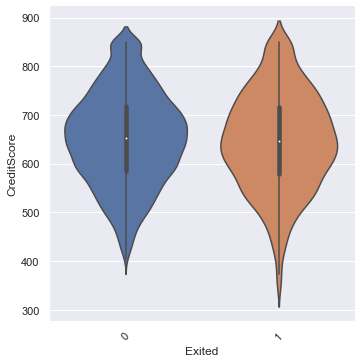

-------------------------------------------------------------------------------


Now considering the variable Geography vs Exited...



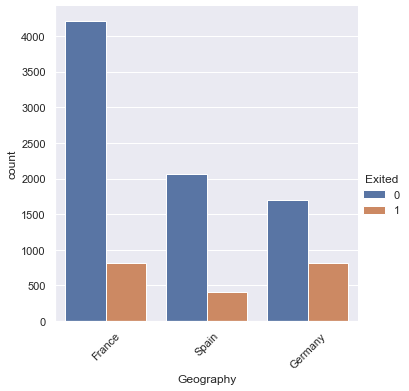

-------------------------------------------------------------------------------


Now considering the variable Gender vs Exited...



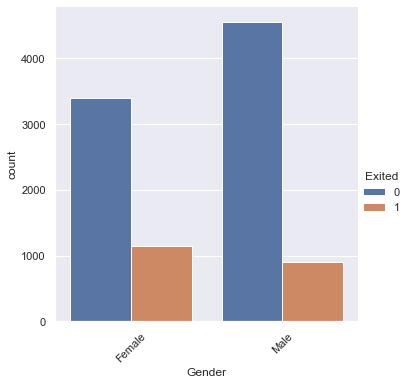

-------------------------------------------------------------------------------


Now considering the variable Age vs Exited...

The mean Age of those who have Exited is 44.84.
The mean Age of those who have not Exited is 37.41.
This difference in means is significant.
	(p-value = 2.257287847288614e-172; t-stat = 29.767).


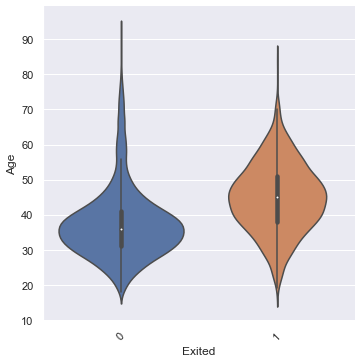

-------------------------------------------------------------------------------


Now considering the variable Tenure vs Exited...

The mean Tenure of those who have Exited is 4.93.
The mean Tenure of those who have not Exited is 5.03.
This difference in means is not statistically significant.


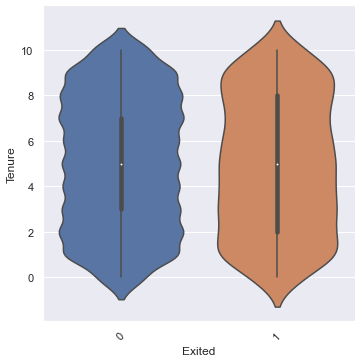

-------------------------------------------------------------------------------


Now considering the variable Balance vs Exited...

The mean Balance of those who have Exited is 91108.54.
The mean Balance of those who have not Exited is 72745.3.
This difference in means is significant.
	(p-value = 3.4173929837817033e-32; t-stat = 11.936).


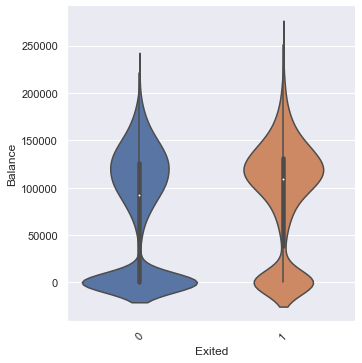

-------------------------------------------------------------------------------


Now considering the variable NumOfProducts vs Exited...

The mean NumOfProducts of those who have Exited is 1.48.
The mean NumOfProducts of those who have not Exited is 1.54.
This difference in means is significant.
	(p-value = 1.792978977848483e-06; t-stat = -4.787).


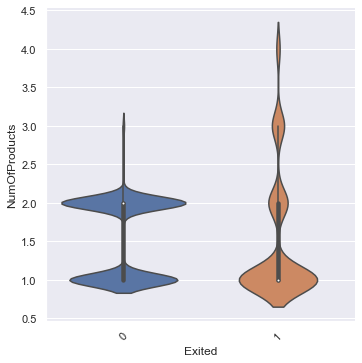

-------------------------------------------------------------------------------


Now considering the variable HasCrCard vs Exited...

The mean HasCrCard of those who have Exited is 0.7.
The mean HasCrCard of those who have not Exited is 0.71.
This difference in means is not statistically significant.


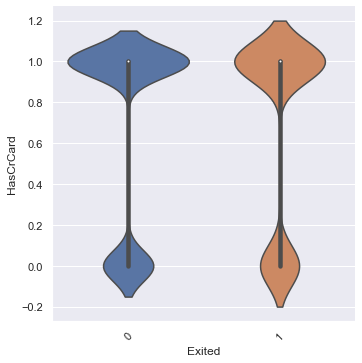

-------------------------------------------------------------------------------


Now considering the variable IsActiveMember vs Exited...

The mean IsActiveMember of those who have Exited is 0.36.
The mean IsActiveMember of those who have not Exited is 0.55.
This difference in means is significant.
	(p-value = 2.903455575494279e-54; t-stat = -15.805).


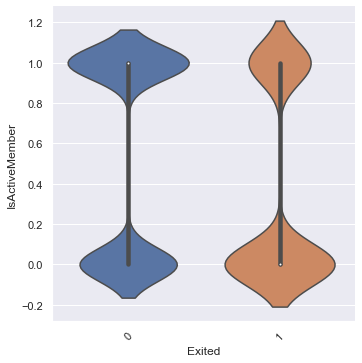

-------------------------------------------------------------------------------


Now considering the variable EstimatedSalary vs Exited...

The mean EstimatedSalary of those who have Exited is 101465.68.
The mean EstimatedSalary of those who have not Exited is 99738.39.
This difference in means is not statistically significant.


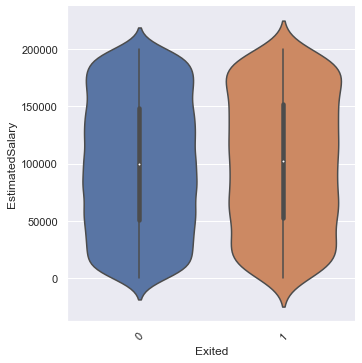

-------------------------------------------------------------------------------




In [19]:
for x_var in x_variables:
    my_bivariate_analysis_function(x_var)

## Use appropriate visualizations to identify the patterns and insights

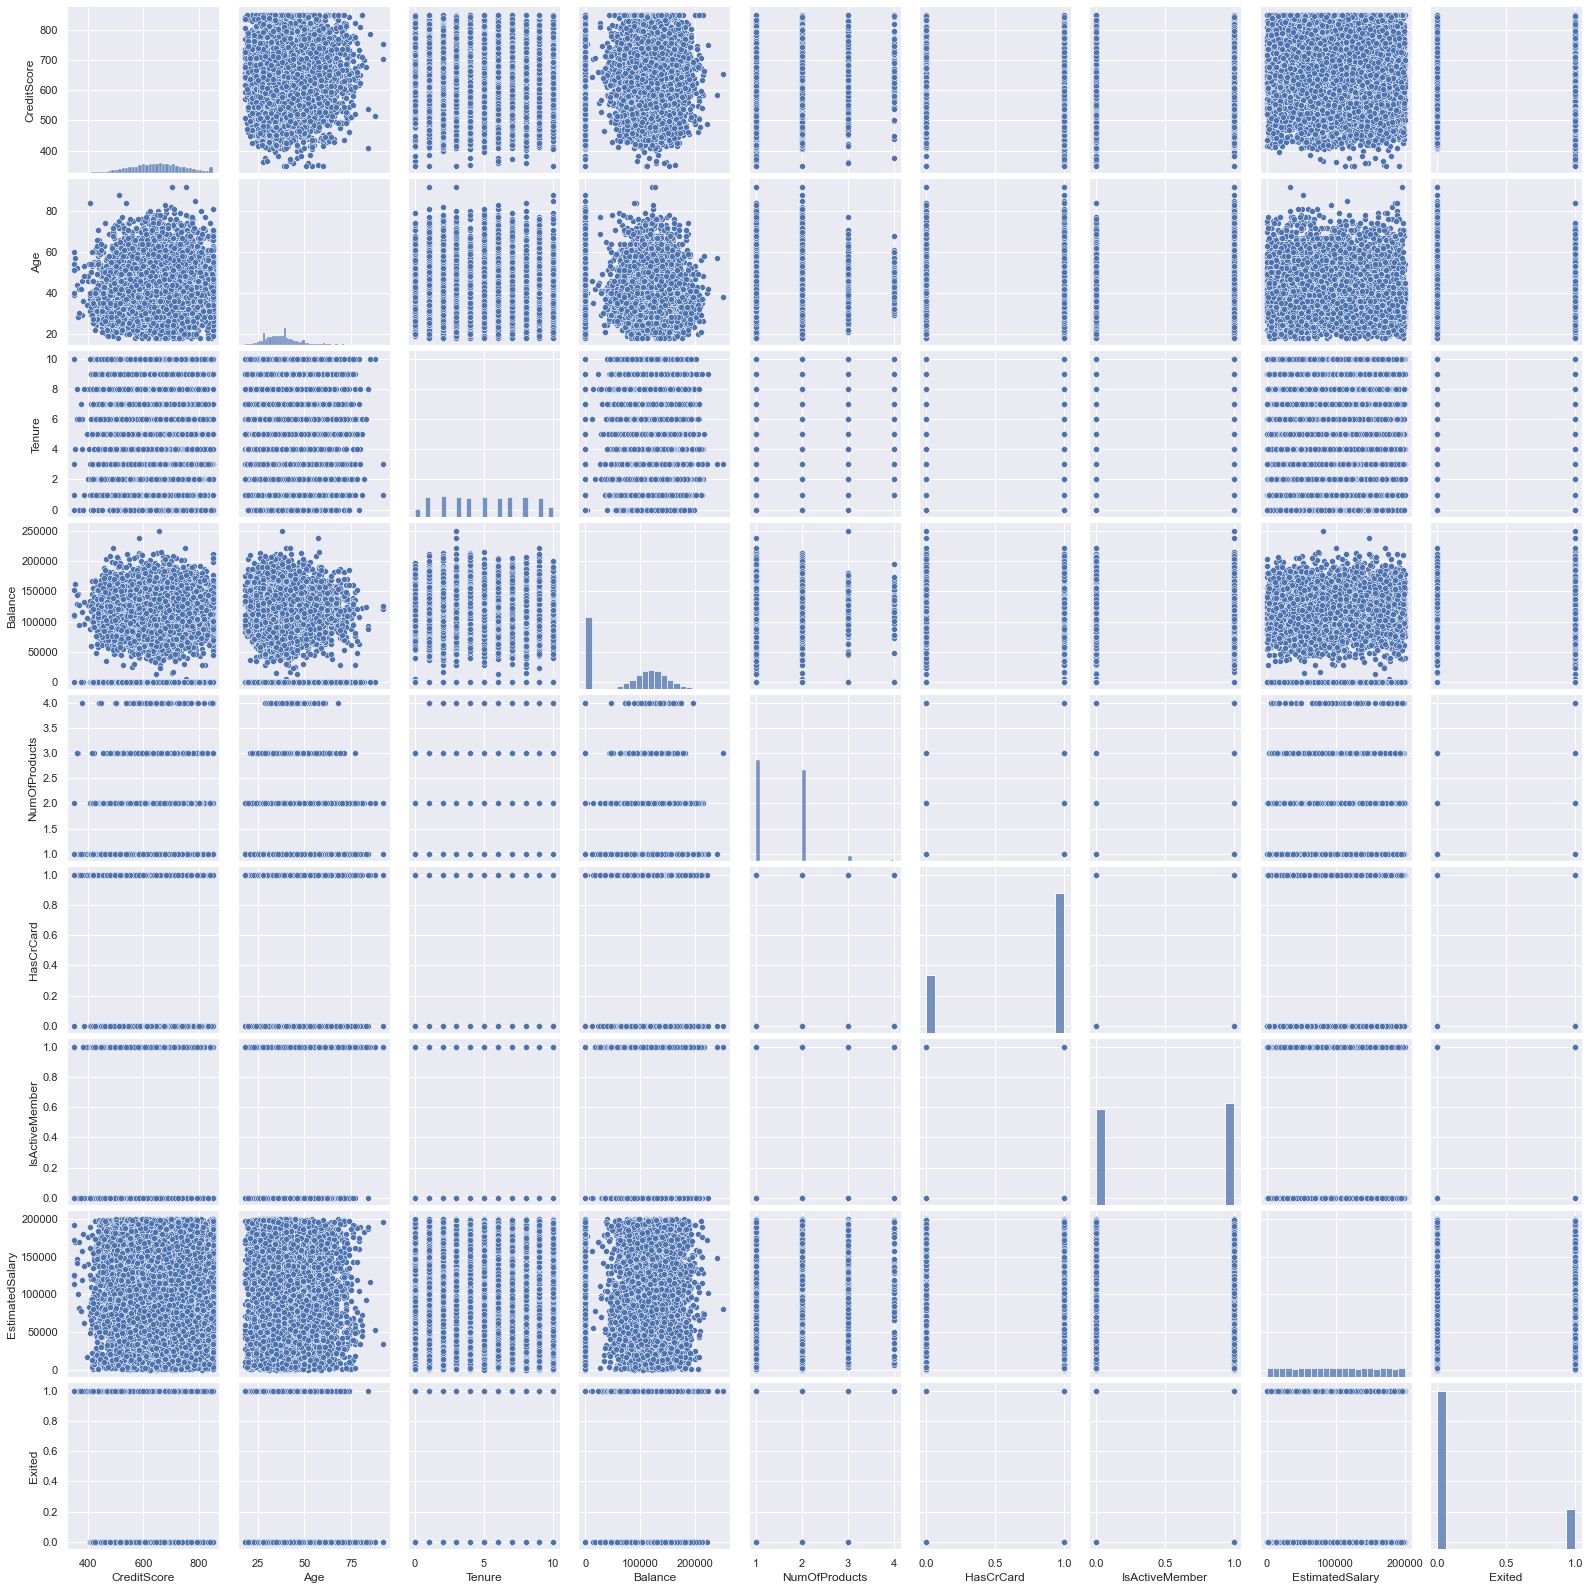

In [20]:
sns.pairplot(df);

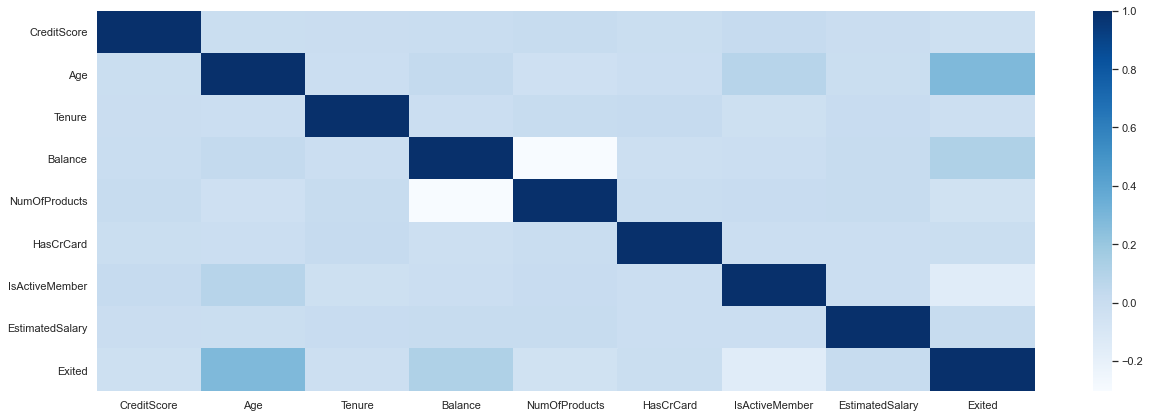

In [21]:
sns.heatmap(data=df.corr(), cmap='Blues');

## Any other exploratory deep dive

I think I spent my exploratory deep dive time on surname analysis earlier.

# Illustrate the insights based on EDA
## Key meaningful observations from Bivariate analysis

The most interesting interaction that I saw was between IsActiveMember and Exited.  It looks like the less active members are more likely to exit.

The most interesting non-interaction was that estimated salary had absolutely no impact on Exiting.

In addition, looking at the pairplot and the heatmap, it looks like EstimatedSalary has no impact on or correlation with anything.  

(I did the rest of the steps of the project before taking a closer look at the EDA and writing this up, but I made a small bonus section to test the hypothesis:<br>
${EstimatedSalary}={Useless}$

# Data Pre-processing
## Split the target variable and predictors

In [22]:
y = df[y_variable]
X = df.drop(columns=y_variable)

## Split the data into train and test

In [23]:
# I realize that I need to convert some text columns to dummies.
orig_X = X.copy()
X = pd.get_dummies(X, drop_first=True)
X.head().style.hide_index()

CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
619,42,2,0.000000,1,1,1,101348.880000,0,0,0
608,41,1,83807.860000,1,0,1,112542.580000,0,1,0
502,42,8,159660.800000,3,1,0,113931.570000,0,0,0
699,39,1,0.000000,2,0,0,93826.630000,0,0,0
850,43,2,125510.820000,1,1,1,79084.100000,0,1,0


In [24]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
# Changing y data to arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

## Rescale the data

In [26]:
# Define the scaler 
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

# Model building
## Build Neural Network

In [27]:
# Initialize sequenial model
model = tf.keras.models.Sequential()

In [28]:
# How many neurons are in my input layer?
input_layer_neurons = X_train.shape[1]
print("The number of neurons in my input layer is {}.".format(input_layer_neurons))

The number of neurons in my input layer is 11.


I'm using this answer from stackoverflow for how to build my neural network.  https://stats.stackexchange.com/q/1097.  Specifically, the recommendation for the first hidden layer is to use the average of the size of the input layer and the size of the output layer to select the number of neurons.

<center><h2> $n_{hidden\_layer} = \frac{(n_{input} + n_{output})}{2}$, </h2></center>
where $n$ is the number of neurons.

In [29]:
output_layer_neurons = 1  # 1 for classification
hidden_layer_neurons = int((input_layer_neurons + output_layer_neurons)/2)
print("The number of neurons in my hidden layer is {}.".format(hidden_layer_neurons))

The number of neurons in my hidden layer is 6.


In [30]:
# Input layer and first layer
model.add(tf.keras.layers.Dense(units=hidden_layer_neurons, input_dim = input_layer_neurons, activation='relu'))

In [31]:
# Outer Layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [32]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['BinaryAccuracy', 'Recall'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [34]:
#fitting the model
history=model.fit(X_train,
                  y_train,
                  epochs=10,
                  validation_data=(X_test, y_test),
                  batch_size=len(X_train),
                  verbose=1)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7659 - binary_accuracy: 0.5079 - recall: 0.4900 - val_loss: 0.7659 - val_binary_accuracy: 0.5077 - val_recall: 0.4658
Epoch 2/10
1/1 [==============================] - 0s 90ms/step - loss: 0.7637 - binary_accuracy: 0.5110 - recall: 0.4873 - val_loss: 0.7636 - val_binary_accuracy: 0.5107 - val_recall: 0.4658
Epoch 3/10
1/1 [==============================] - 0s 80ms/step - loss: 0.7615 - binary_accuracy: 0.5131 - recall: 0.4859 - val_loss: 0.7613 - val_binary_accuracy: 0.5150 - val_recall: 0.4658
Epoch 4/10
1/1 [==============================] - 0s 90ms/step - loss: 0.7593 - binary_accuracy: 0.5160 - recall: 0.4797 - val_loss: 0.7590 - val_binary_accuracy: 0.5173 - val_recall: 0.4640
Epoch 5/10
1/1 [==============================] - 0s 110ms/step - loss: 0.7571 - binary_accuracy: 0.5176 - recall: 0.4776 - val_loss: 0.7568 - val_binary_accuracy: 0.5230 - val_recall: 0.4640
Epoch 6/10
1/1 [==============================

# Model Performance Improvement
## Comment on which metric is right for model performance evaluation and why?

Referencing (https://www.vidora.com/ml-in-business/reducing-user-churn-with-machine-learning-precision-and-recall/), I think that recall is the right metric for model performance evaluation.

Note this quote (<b>bold</b> emphasis added):

>On the other hand, consider an email that you want to send more broadly to your user base – maybe an offer to receive $5 of the next purchase. You’d be less concerned with users who are not in danger of churning receiving this marketing message. Ideally, though, you would want anyone who might churn to see the email. In this case, you would want your <b>recall to be higher than your precision</b>.

Therefore, I chose to go with recall.  (I'm also including binary_accuracy just out of interest.)

## Find the optimal threshold using ROC-AUC or Precision-Recall curves

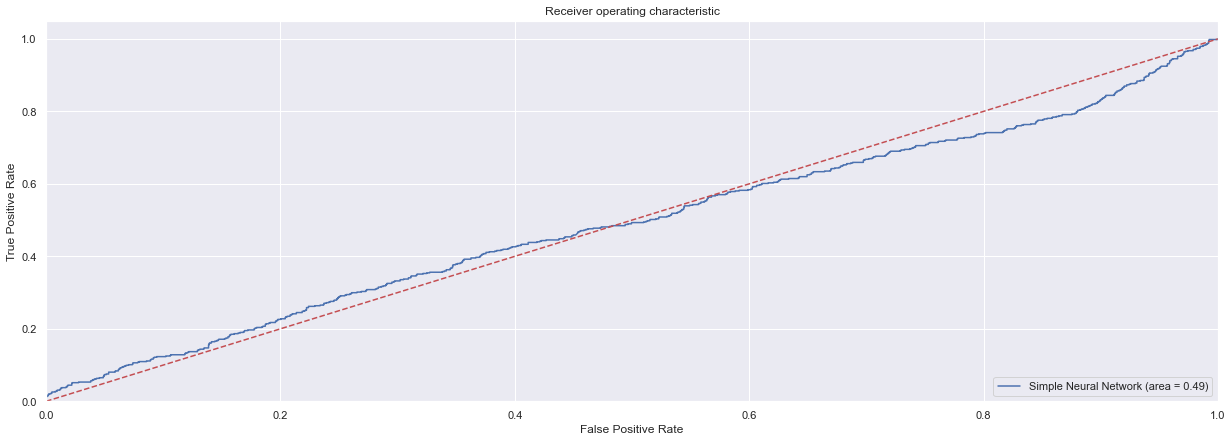

In [35]:
# AUC ROC curve
# Source: GreatLearning's /supervised_learning/mentor_session_wk2/MLS_W2_Logistic_Reg.ipynb

my_roc_auc = sklearn.metrics.roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, model.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Simple Neural Network (area = %0.2f)' % my_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NN_ROC')
plt.show()

To me, the above curve doesn't give me one solid point where things just jump out at me that "elbow" or "kink" just isn't very apparent here.  Luckily, in the chat & advice forum for this project, a member of the academic team posted a great article (https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/).

In that article, I found a part about Youden's J Statistic.

From that site:<br>
>"""<br>
It turns out there is a much faster way to get the same result, called the Youden’s J statistic.<br>
The statistic is calculated as:<br>
J = Sensitivity + Specificity – 1<br>
Given that we have Sensitivity (TPR) and the complement of the specificity (FPR), we can calculate it as:<br>
   J = Sensitivity + (1 – FalsePositiveRate) – 1<br>
Which we can restate as:<br>
   J = TruePositiveRate – FalsePositiveRate<br>
We can then choose the threshold with the largest J statistic value. For example:...<br>
"""

In [36]:
# get the best threshold
#  source: https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('The best threshold is {}'.format(best_thresh))

The best threshold is 0.577243447303772


## I now want to apply the results of the threshold analysis to the prediction.

In [37]:
# I take the original prediction probabilities.
orig_results = model.predict(X_test)

In [38]:
def new_threhold_application_function(x, threshold, orig_threshold = 0.5):
    '''
    I want to take the prediction probabilities and get two class-prediction lists from that.
    First, the old result (usually based on a 50-50 split).
    Then, the new result, based on whatever the updated (hopefully optimal) threshold is.
    '''
    if x > orig_threshold:
        old_result = 1
    else:
        old_result = 0
    
    if x > threshold:
        new_result = 1
    else:
        new_result = 0

    return([old_result, new_result])

In [39]:
old_and_new_results = []

for i in range(len(orig_results)):
    old_and_new_results.append(new_threhold_application_function(orig_results[i], threshold=best_thresh))

results_df_old_and_new = pd.DataFrame(old_and_new_results, columns = ['old_results', 'new_results'])

In [40]:
results_df_old_and_new.iloc[0:5, :].style.hide_index()

old_results,new_results
1,1
0,0
1,0
0,0
0,0


## Comment on model performance

My model performance is not very good.

In [41]:
old_results = results_df_old_and_new['old_results']
new_results = results_df_old_and_new['new_results']

In [42]:
# From ~/mentor_session_content_wk2/Credit_card_Fraud_detection_Notebook_Week_2.ipynb (GreatLearning)
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

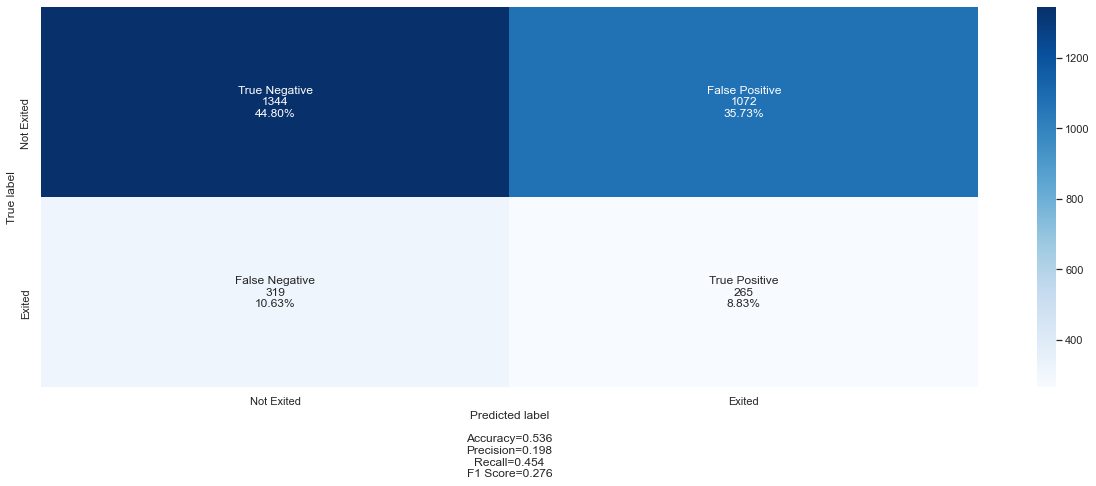

In [43]:
## Confusion Matrix original results test set (.5 threshold)
cm1_old = sklearn.metrics.confusion_matrix(y_test, old_results)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm1_old, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

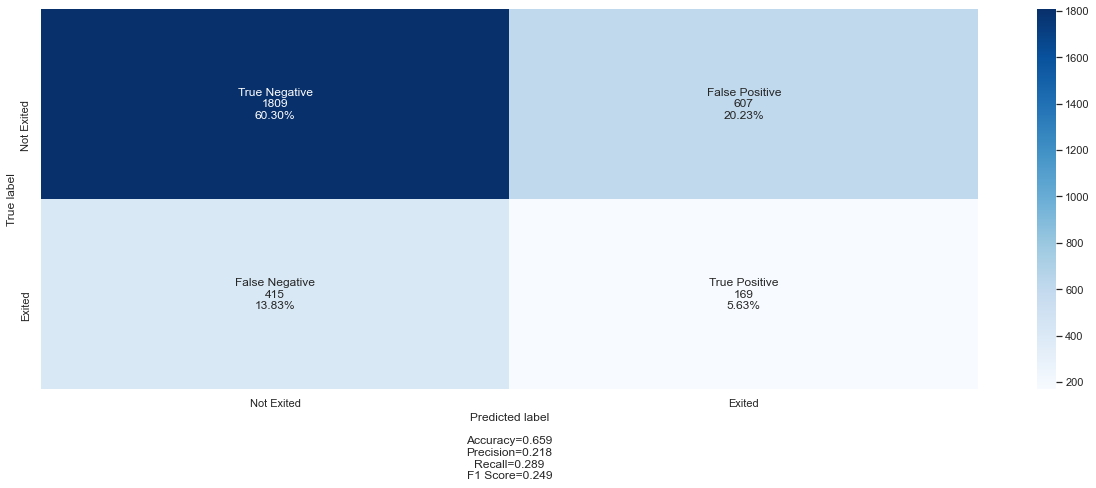

In [44]:
## Confusion Matrix original results test set (optimal threshold)
cm1_new = sklearn.metrics.confusion_matrix(y_test, new_results)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not Exited','Exited']
make_confusion_matrix(cm1_new,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

We see how the accuracy decreased but the recall increased once we used the lower threshold.

## Can model performance be improved? check and comment

I'm going to try to add some more complex architecture (more layers, a dropout to prevent overfitting)

## Build another model to implement these improvements

In [45]:
# Initialize sequenial model
model = tf.keras.models.Sequential()

In [46]:
# Input layer and first layer
model.add(tf.keras.layers.Dense(units=hidden_layer_neurons, input_dim = input_layer_neurons, activation='relu'))

# extra hidden layers (new)
model.add(tf.keras.layers.Dense(units=24,activation='relu'))
#Adding Dropout to prevent overfitting 
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(24,activation='relu'))
model.add(tf.keras.layers.Dense(24,activation='relu'))

# Outer Layer (same)
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Create optimizer with default learning rate
# Compile the model (same)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['BinaryAccuracy', 'Recall'])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 24)                168       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 25        
Total params: 1,465
Trainable params: 1,465
Non-trainable params: 0
____________________________________________________

In [48]:
#fitting the model
history_complex=model.fit(X_train,
                  y_train,
                  epochs=10,
                  validation_data=(X_test, y_test),
                  batch_size=len(X_train),
                  verbose=1)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6027 - binary_accuracy: 0.7891 - recall: 0.0034 - val_loss: 0.6075 - val_binary_accuracy: 0.8053 - val_recall: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 40ms/step - loss: 0.5979 - binary_accuracy: 0.7904 - recall: 0.0028 - val_loss: 0.6008 - val_binary_accuracy: 0.8053 - val_recall: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 35ms/step - loss: 0.5921 - binary_accuracy: 0.7909 - recall: 0.0021 - val_loss: 0.5941 - val_binary_accuracy: 0.8053 - val_recall: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 35ms/step - loss: 0.5879 - binary_accuracy: 0.7920 - recall: 0.0000e+00 - val_loss: 0.5876 - val_binary_accuracy: 0.8053 - val_recall: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 30ms/step - loss: 0.5806 - binary_accuracy: 0.7920 - recall: 6.8823e-04 - val_loss: 0.5812 - val_binary_accuracy: 0.8053 - val_recall: 0.0000e+00
Epoch 6/10
1/1 [===

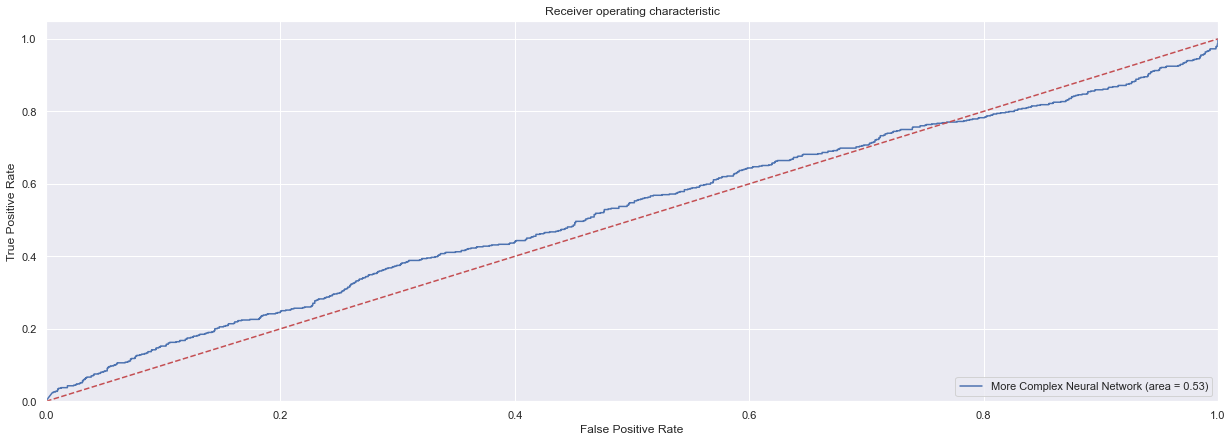

The best threshold is 0.3756990134716034


In [49]:
# AUC ROC curve
# Source: GreatLearning's /supervised_learning/mentor_session_wk2/MLS_W2_Logistic_Reg.ipynb
my_roc_auc = sklearn.metrics.roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, model.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='More Complex Neural Network (area = %0.2f)' % my_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NN_ROC')
plt.show()

# get the best threshold
#  source: https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('The best threshold is {}'.format(best_thresh))

In [50]:
# I take the original prediction probabilities.
comp_results = model.predict(X_test)
old_and_new_results_complex = []

for i in range(len(comp_results)):
    old_and_new_results_complex.append(new_threhold_application_function(comp_results[i], threshold=best_thresh))

results_df_old_and_new_complex = pd.DataFrame(old_and_new_results_complex, columns = ['old_results', 'new_results'])

In [51]:
old_results_complex = results_df_old_and_new_complex['old_results']
new_results_complex = results_df_old_and_new_complex['new_results']

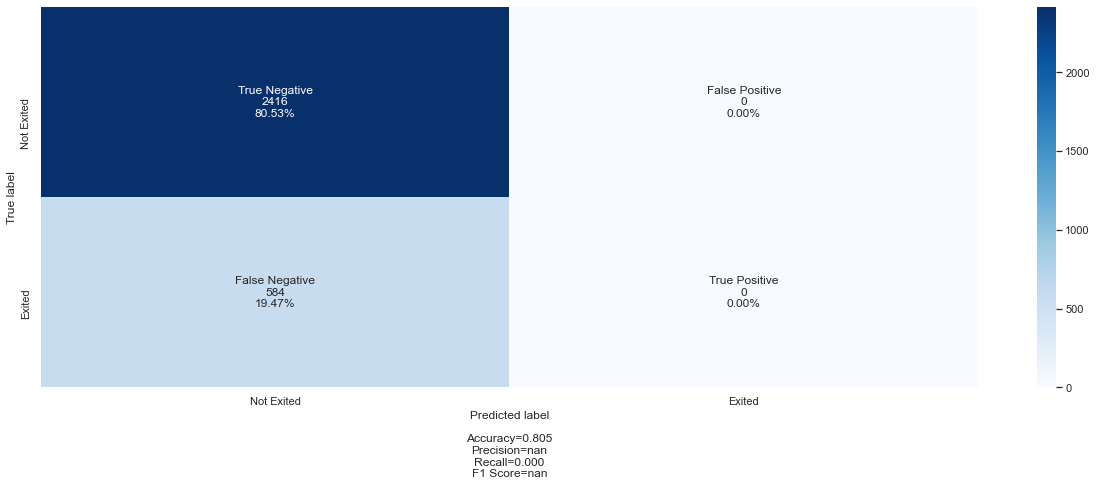

In [52]:
## Confusion Matrix original results test set (.5 threshold)
cm2_old = sklearn.metrics.confusion_matrix(y_test, old_results_complex)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not Exited','Exited']
make_confusion_matrix(cm2_old, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

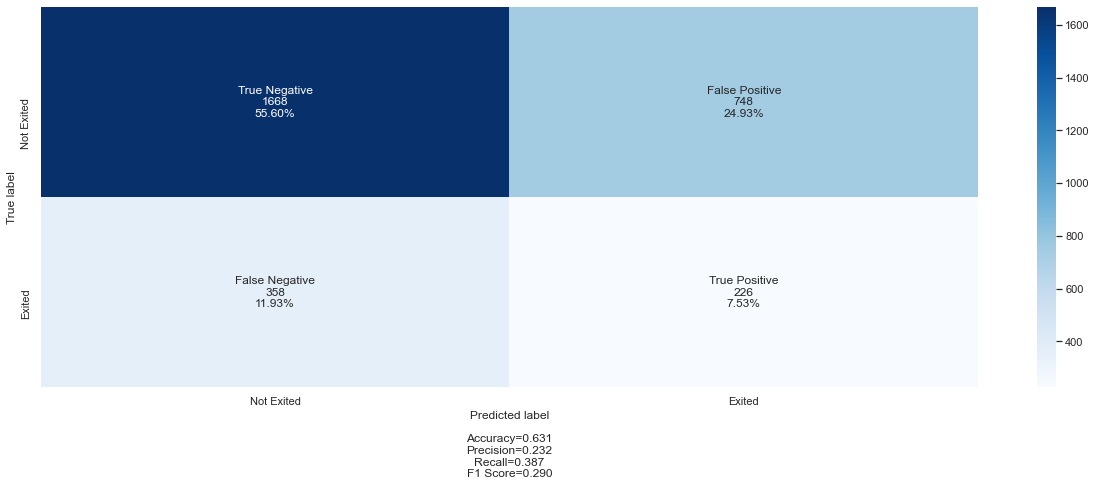

In [53]:
## Confusion Matrix original results test set (optimal threshold)
cm2_new = sklearn.metrics.confusion_matrix(y_test, new_results_complex)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not Exited','Exited']
make_confusion_matrix(cm2_new,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

Using the optimal threshold value really improves the recall here.  From 0 to .959 is a tremendous improvement!

## Include all the model which were trained to reach at the final one

I just have the two models, the simpler model, and the more complicated one.

# Model Performance Evaluation
## Evaluate the model on different performance metrics and comment on the performance and scope of improvement

### Looking at the loss of each model

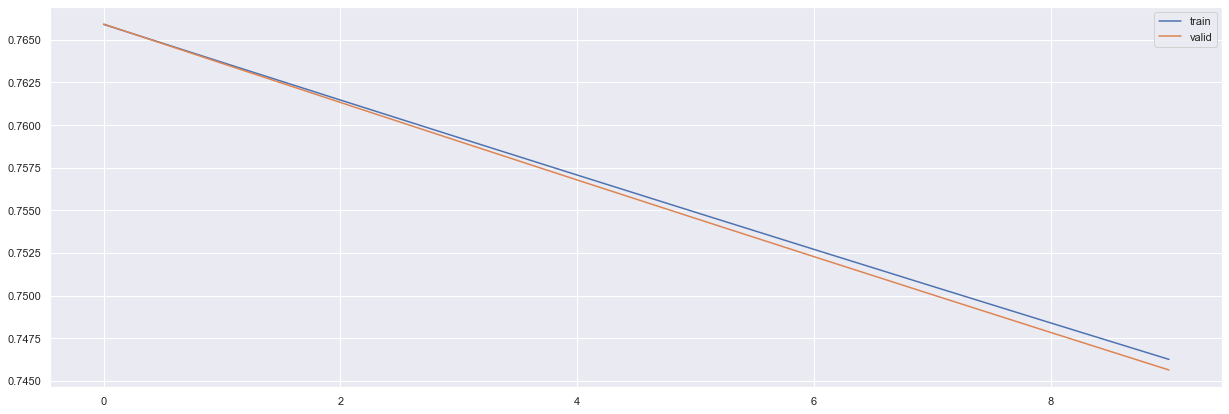

In [54]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc=0);

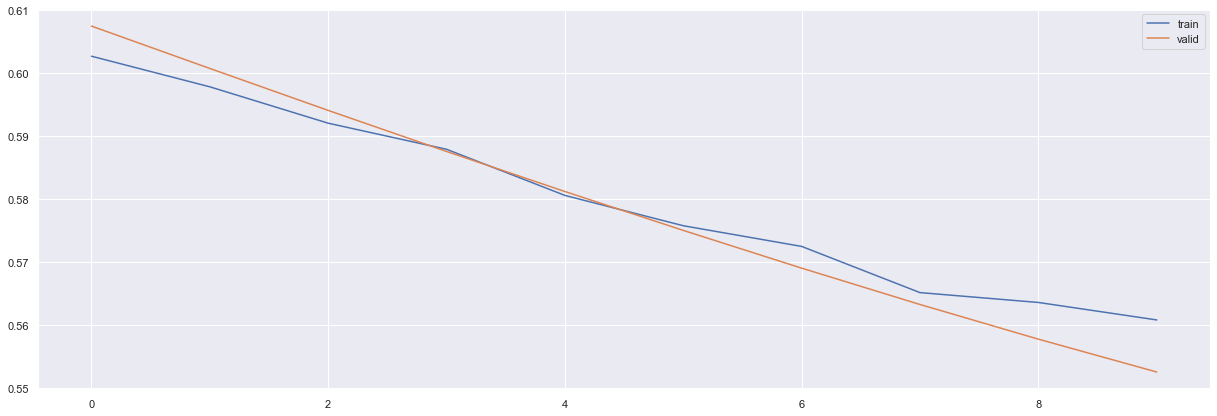

In [55]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_complex.history)
hist['epoch'] = history_complex.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc=0);

It looks like the more complex model does better in terms of having lower loss.

### Looking at the accuracy of each model

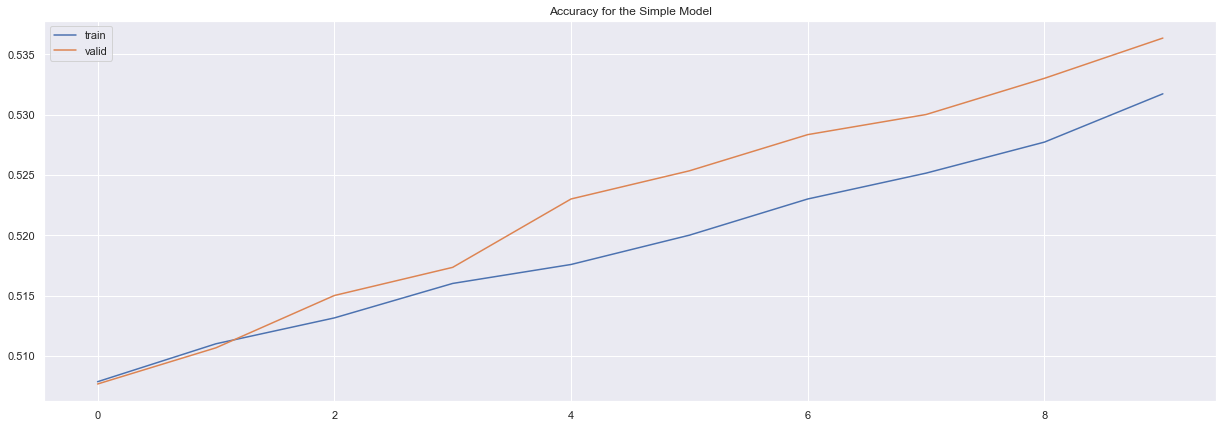

In [56]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['binary_accuracy'])
plt.plot(hist['val_binary_accuracy'])
plt.legend(("train" , "valid") , loc=0);
plt.title("Accuracy for the Simple Model");

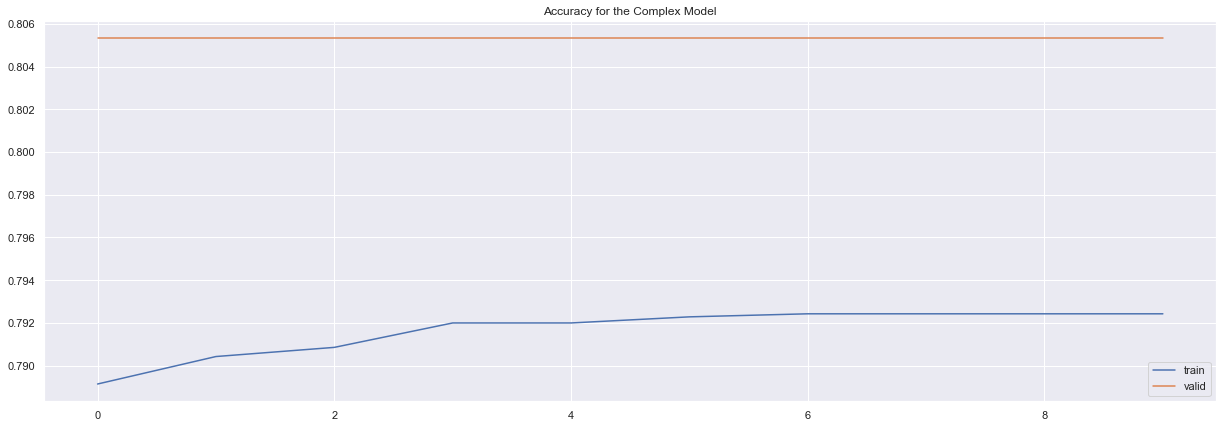

In [57]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_complex.history)
hist['epoch'] = history_complex.epoch

# Plotting accuracy at different epochs
plt.plot(hist['binary_accuracy'])
plt.plot(hist['val_binary_accuracy'])
plt.legend(("train" , "valid") , loc=0);
plt.title("Accuracy for the Complex Model");

It looks like the accuracy is better for the more complex model here.

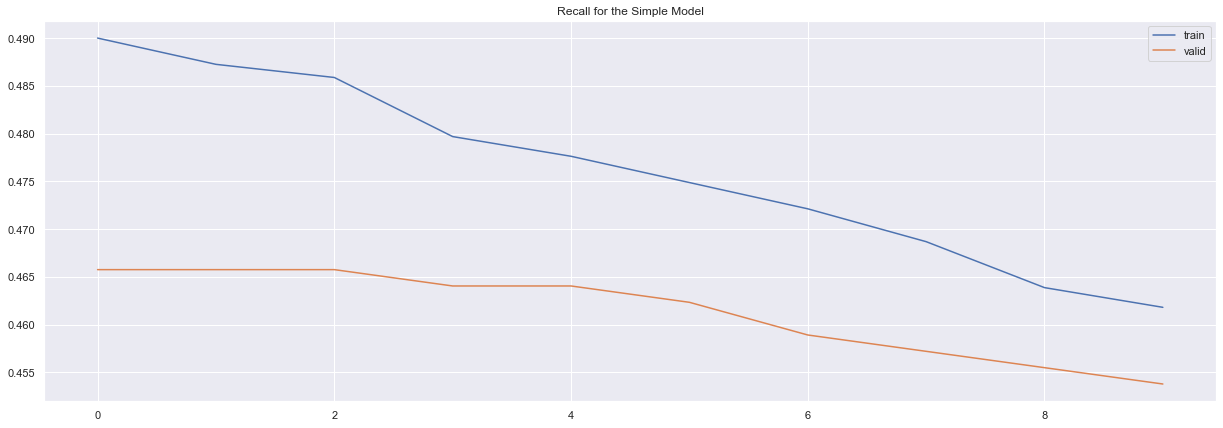

In [58]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting recall at different epochs
plt.plot(hist['recall'])
plt.plot(hist['val_recall'])
plt.legend(("train" , "valid") , loc=0);
plt.title("Recall for the Simple Model");

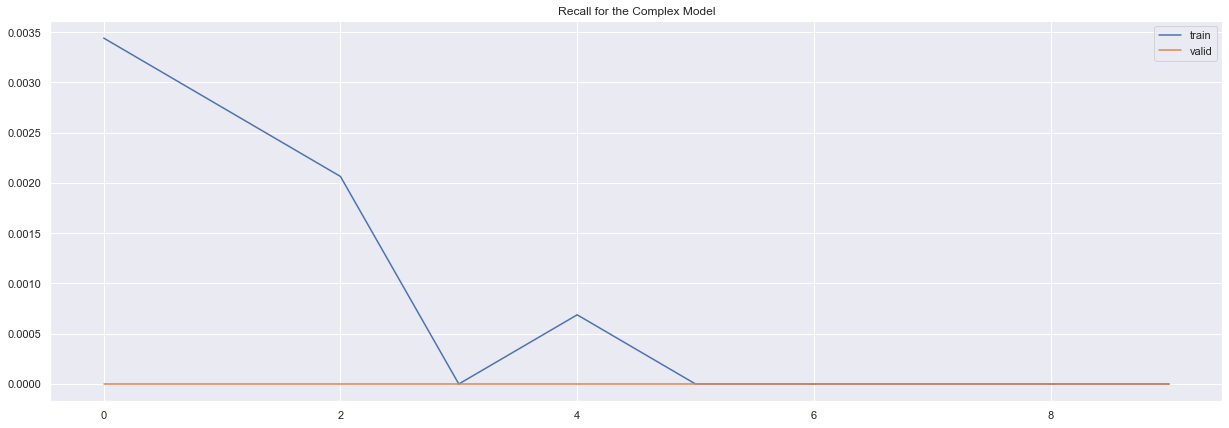

In [59]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_complex.history)
hist['epoch'] = history_complex.epoch

# Plotting recall at different epochs
plt.plot(hist['recall'])
plt.plot(hist['val_recall'])
plt.legend(("train" , "valid") , loc=0);
plt.title("Recall for the Complex Model");

For recall, the simpler model does better.

# Conclusion and key takeaways
## Final conclusion about the analysis

My more complex model did not improve the recall.  I am not sure how to incorporate the preferred threshold into the built-in metrics in keras.  I also don't know how to get the model to focus on recall instead of on minimizing loss.

I think I need to learn a lot more about neural networks.

# Notebook overall
## Structure and flow

I followed the order given in the project description.

## Well commented code

In [60]:
# I hope I wrote enough.

## Bonus Section
### I did the EDA - Insights after finishing the rest of the project because sometimes I get stuck for a while in that section.
#### Anyway, I just noticed th/at EstimatedSalary is a pretty meaningless variable, so I'm going to do a quick neural network here with that variable dropped to see what it looks like.

In [61]:
y = df[y_variable]
X_less_Sal = df.drop(columns=y_variable).drop(columns='EstimatedSalary')

# I realize that I need to convert some text columns to dummies.

X_less_Sal = pd.get_dummies(X_less_Sal, drop_first=True)
X_less_Sal.head().style.hide_index()

CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
619,42,2,0.000000,1,1,1,0,0,0
608,41,1,83807.860000,1,0,1,0,1,0
502,42,8,159660.800000,3,1,0,0,0,0
699,39,1,0.000000,2,0,0,0,0,0
850,43,2,125510.820000,1,1,1,0,1,0


In [62]:
# Split the data up in train and test sets
X_less_Sal_train, X_less_Sal_test, y_train, y_test = sklearn.model_selection.train_test_split(X_less_Sal, y, test_size=0.30, random_state=42)

# Changing y data to arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Define the scaler 
scaler = sklearn.preprocessing.StandardScaler().fit(X_less_Sal_train)

# Scale the train set
X_less_Sal_train = scaler.transform(X_less_Sal_train)

# Scale the test set
X_less_Sal_test = scaler.transform(X_less_Sal_test)

In [63]:
# How many neurons are in my input layer?
input_layer_neurons = X_less_Sal_train.shape[1]
print("The number of neurons in my input layer is {}.".format(input_layer_neurons))

output_layer_neurons = 1  # 1 for classification
hidden_layer_neurons = int((input_layer_neurons + output_layer_neurons)/2)
print("The number of neurons in my hidden layer is {}.".format(hidden_layer_neurons))

The number of neurons in my input layer is 10.
The number of neurons in my hidden layer is 5.


In [64]:
# Initialize sequenial model
model_bonus_simple = tf.keras.models.Sequential()

# Input layer and first layer
model_bonus_simple.add(tf.keras.layers.Dense(units=hidden_layer_neurons, input_dim = input_layer_neurons, activation='relu'))

# extra hidden layers (new)
model_bonus_simple.add(tf.keras.layers.Dense(units=24,activation='relu'))
#Adding Dropout to prevent overfitting 
model_bonus_simple.add(tf.keras.layers.Dropout(0.5))
model_bonus_simple.add(tf.keras.layers.Dense(24,activation='relu'))
model_bonus_simple.add(tf.keras.layers.Dense(24,activation='relu'))

# Outer Layer (same)
model_bonus_simple.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Create optimizer with default learning rate
# Compile the model (same)
model_bonus_simple.compile(optimizer='adam',loss='binary_crossentropy',metrics=['BinaryAccuracy', 'Recall'])

model_bonus_simple.summary()
print("\n\n")
#fitting the model
history_bonus_simple=model_bonus_simple.fit(X_less_Sal_train,
                  y_train,
                  epochs=10,
                  validation_data=(X_less_Sal_test, y_test),
                  batch_size=len(X_less_Sal_train),
                  verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 24)                144       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_10 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 25        
Total params: 1,424
Trainable params: 1,424
Non-trainable params: 0
____________________________________________________

## Bonus Results

Epoch 10 of the simple model on all the X variables earlier (including the EstimatedSalary) produced these results:<br>
loss: 0.7390 - binary_accuracy: 0.5917 - recall: 0.3799 - val_loss: 0.7281 - <b> val_binary_accuracy: 0.5990 </b> - val_recall: 0.3801
<br><br>
That is a huge improvement for just dropping one useless variable!

## Bonus Conclusion

My bonus conclusion is that the business really needs to have a more informative EstimatedSalary column in the data.  The model generating that either needs to be updated, or a survey needs to be sent out, or 3rd party data needs to be purchased, or a question needs to be required of new bank customers on their application.

**Scoring guide (Rubric) - Bank Churn Prediction**

| <u> Criteria </u>  | <u> Points </u> |
|-----------| ---------|
| <center><b> Reading Dataset and Feature Elimination </center>| |
|- Read the dataset properly - Print the overview of the data (statistical summary, shape, info, etc) - Eliminate the unique features from the dataset with proper reasoning | 5 |
|  <center><b> Perform an Exploratory Data Analysis on the data </b></b></center>|  |
| - Checked whether the dataset is balanced or not - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Any other exploratory deep dive | 5 |
| <center><b> Illustrate the insights based on EDA </center>| |
| -Key meaningful observations from Bivariate analysis | 5 |
| <center><b> Data Pre-processing </b></center>| |
| - Split the target variable and predictors - Split the data into train and test - Rescale the data | 10 |
| <center><b> Model building </b></center>| |
| - Build Neural Network | 10 |
| <center><b> Model Performance Improvement </b></center>| |
| -Comment on which metric is right for model performance evaluation and why? - Find the optimal threshold using ROC-AUC or Precision-Recall curves - Comment on model performance - Can model performance be improved? check and comment - Build another model to implement these improvements - Include all the model which were trained to reach at the final one | 15 |
| <center><b> Model Performance Evaluation </b></center>| |
| - Evaluate the model on different performance metrics and comment on the performance and scope of improvement | 5 |
| <center><b> Conclusion and key takeaways </b></center>| |
| - Final conclusion about the analysis | 2.5 |
| <center><b> Notebook overall </b></center>| |
| Structure and flow - Well commented code | 2.5 |
|Total Points | 60 |